### Base Imports

In [1]:
# for data analysis 
import numpy as np
import pandas as pd
# from scipy import ... 
# from sklearn import ...

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns
sns.set() # use seaborn defaults

# https://github.com/jgillick/LendingClub

### Set Options

In [2]:
# display options
%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load & Explore Data

In [4]:
# For preprocessing: https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html
# For custom blockers: https://recordlinkage.readthedocs.io/en/latest/notebooks/custom_algorithms.html
# For multipler blockers: https://recordlinkage.readthedocs.io/en/latest/performance.html
# For ML algs: https://recordlinkage.readthedocs.io/en/latest/notebooks/classifiers.html

four_train = pd.read_json("foursquare_train_hard.json")
locu_train = pd.read_json("locu_train_hard.json") 
four_train = four_train.set_index('id')
locu_train = locu_train.set_index('id')

four_test = pd.read_json("foursquare_test_hard.json")
locu_test = pd.read_json("locu_test_hard.json")
four_test = four_test.set_index('id')
locu_test = locu_test.set_index('id')

matches_train = pd.read_csv("matches_train_hard.csv")
matches_train = matches_train.set_index(['locu_id', 'foursquare_id'])

(600, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
4f328ea619836c91c7e3714a,United States,40.794855,New York,-73.966069,Chen Jin Diao Restaurant,(212) 678-4680,NaN,NY,800 Columbus Ave.,NaN
4c37b5f6ae2da593a56affc5,United States,40.760460,New York,-73.994920,West Side Steakhouse,(212) 564-4803,10036,NY,597 10th Ave.,NaN
4b41060df964a52098bf25e3,United States,40.760249,New York,-73.983746,Pearls: Chinese & Szechuan Cuisine,(212) 582-7380,10019,NY,732 7th Ave.,NaN
3fd66200f964a520ece41ee3,United States,40.708660,New York,-74.011263,Suspenders,(212) 732-5005,10006,NY,111 Broadway,http://www.suspendersnyc.com
52064aab11d284f64d088329,United States,40.718105,New York,-73.996096,Grand Century Cafe,None,NaN,NY,NaN,NaN


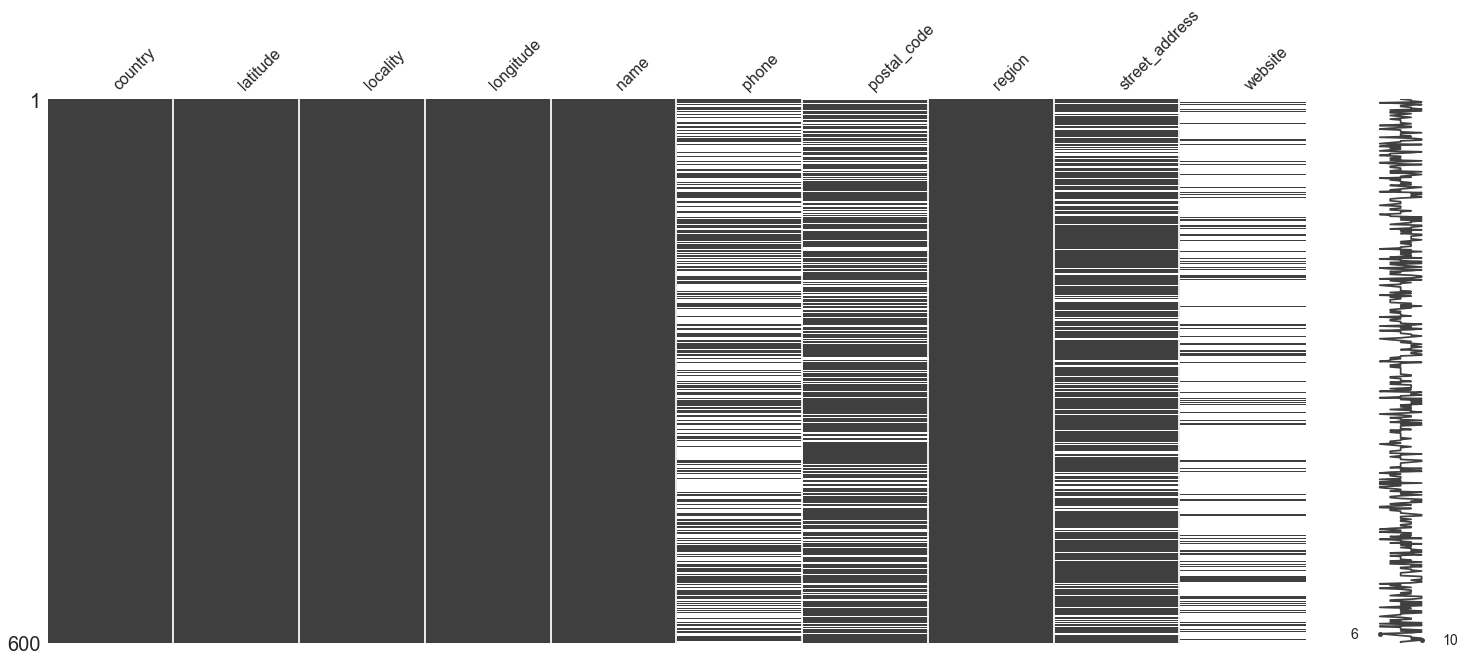

In [5]:
four_train.shape
four_train = four_train.replace("", np.nan)
four_train.head()

msno.matrix(four_train)

(600, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
cc9e8f40230c6ead2873,United States,40.739822,New York,-73.985144,Chipotle Mexican Grill,2126736904,10010,NY,125 East 23rd St.,http://www.chipotle.com/
81df045e563fb6cab7f7,United States,40.810765,New York,-73.952591,Honey Salon Inc,2126630100,10026,NY,174 Saint Nicholas Ave.,NaN
b265cf6c80121211dbfc,United States,40.743580,New York,-73.986127,Palatte,6464763812,10016,NY,66 Madison Ave.,http://www.palattenyc.com/
4fc50abefae5311cc2b3,United States,40.828820,New York,-73.949022,Best Taste Restaurant,2122815691,10031,NY,3609 Broadway,NaN
72560dc41f1b7aed0d47,United States,40.749936,New York,-73.983849,Integra Hair System Inc,2125636786,10018,NY,11 W. 36th St. # 3,http://www.integrahair.com/


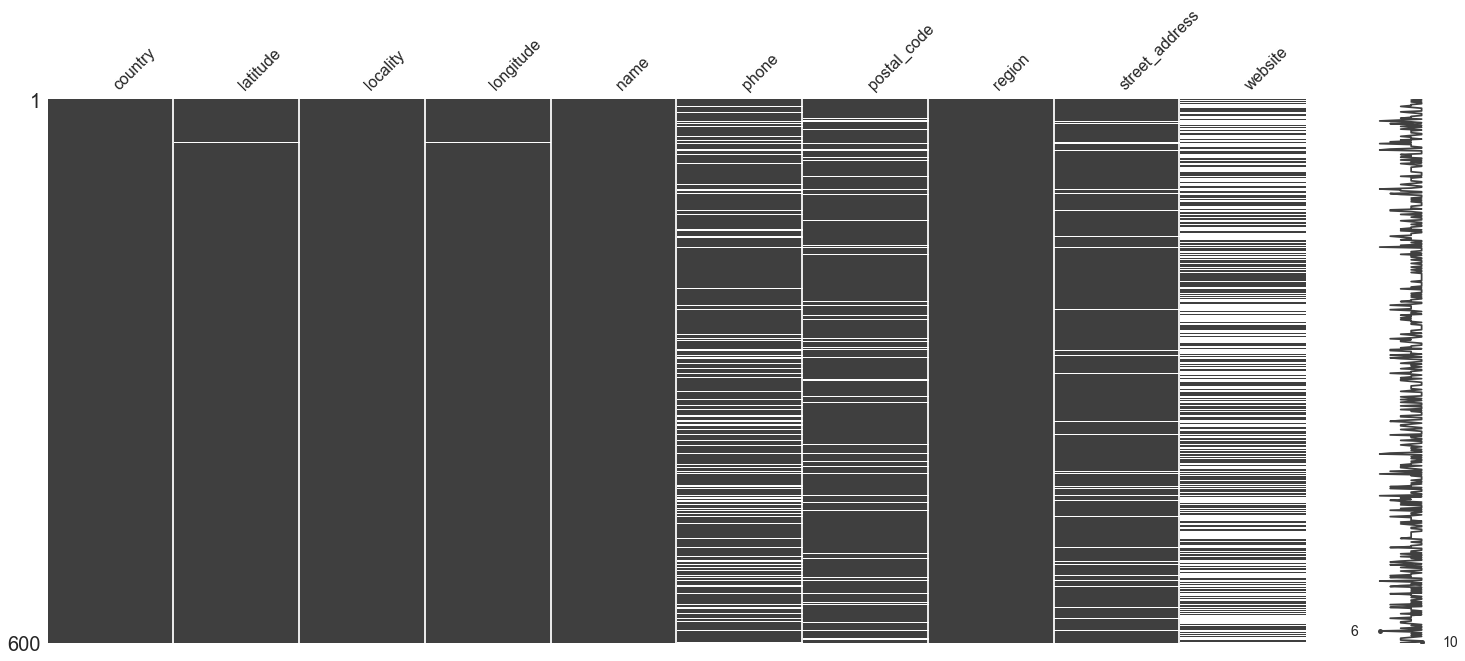

In [6]:
locu_train.shape
locu_train = locu_train.replace("", np.nan)
locu_train.head()

msno.matrix(locu_train)

(400, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
4eefac5cb8f76a24a7b12202,United States,40.732820,New York,-73.998113,Sticky's Finger Joint,(212) 777-7131,10011,NY,31 W. 8th St.,NaN
4fb6aeabe4b02861a894f317,United States,40.769622,New York,-73.964026,Café 7,None,10021,NY,725 Park Ave. 7th Floor,NaN
4f1227d9e4b03856f12a915d,United States,40.722477,New York,-73.994903,232 Mott,None,10012,NY,232 Mott St.,NaN
51ddfccf498eefb41d65b1f1,United States,40.757635,New York,-73.985828,"Hard Rock Cafe,New York",None,NaN,NY,NaN,NaN
4d71199c783f8cfa4efae1d6,United States,40.713705,New York,-73.990162,Lo Mein/Noodles Cart,None,NaN,NY,Rutgers St.,NaN


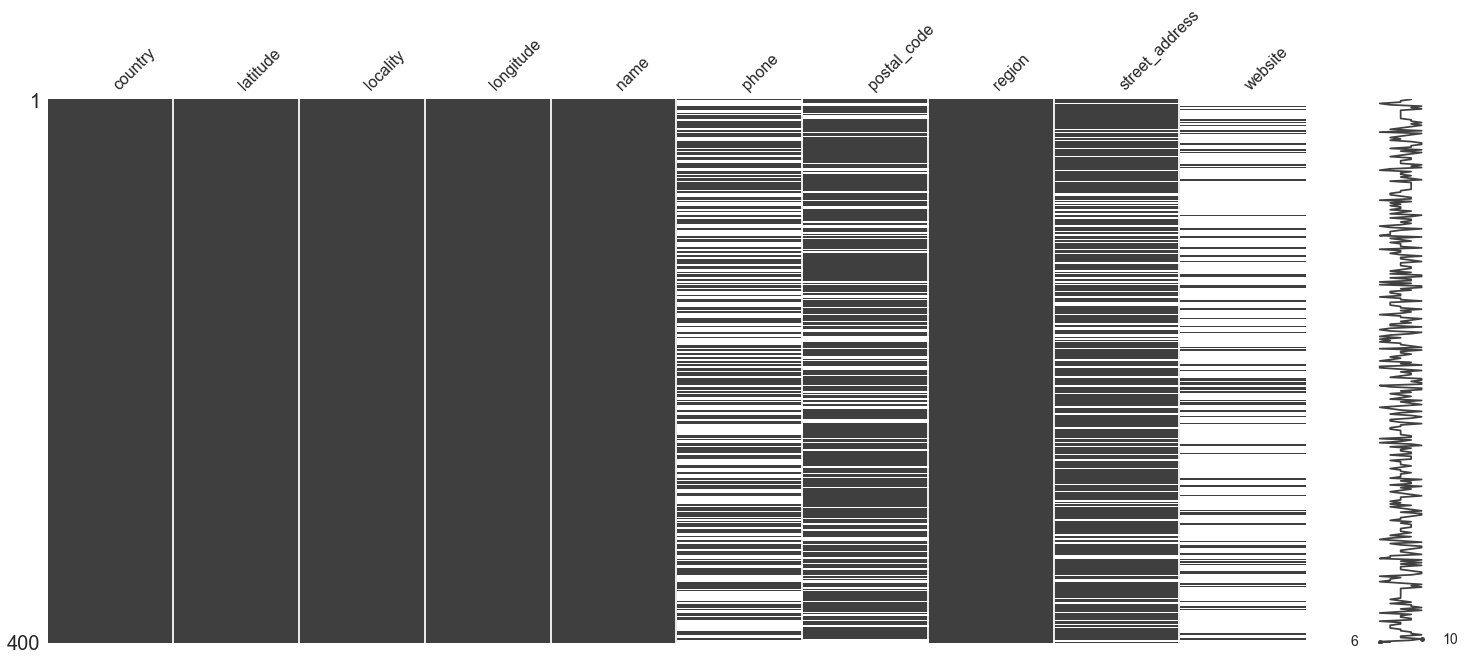

In [7]:
four_test.shape
four_test = four_test.replace("", np.nan)
four_test.head()

msno.matrix(four_test)

(400, 10)

,country,latitude,locality,longitude,name,phone,postal_code,region,street_address,website
id,,,,,,,,,,
b48da849c54f904013e2,United States,40.758005,New York,-73.992727,Panda Restaurant,2126950836,10036,NY,570 9th Ave.,http://pandarg.com/
95ad783fd1c65bb8fdbf,United States,40.721025,New York,-73.982903,El Maguey y la Tuna,2124733919,10002,NY,321 East Houston St.,http://www.elmagueyylatunamex.com
5060d123ccad77923b20,United States,40.725772,New York,-73.991947,Hair Date Salon/ Professionals Hair Cut,2122288381,10003,NY,329 Bowery,http://www.hairdatenyc.com/
9dd6f6b177096efd5da4,United States,40.802047,New York,-73.936988,Pizza Plus Inc,2122890005,10035,NY,2253 3rd Ave. # 1,http://www.pizzaplusmore.com/
4773c30d2df4368c0d09,United States,40.725190,New York,-73.992547,Double Crown,2122540350,10012,NY,316 Bowery,http://doublecrown-nyc.com


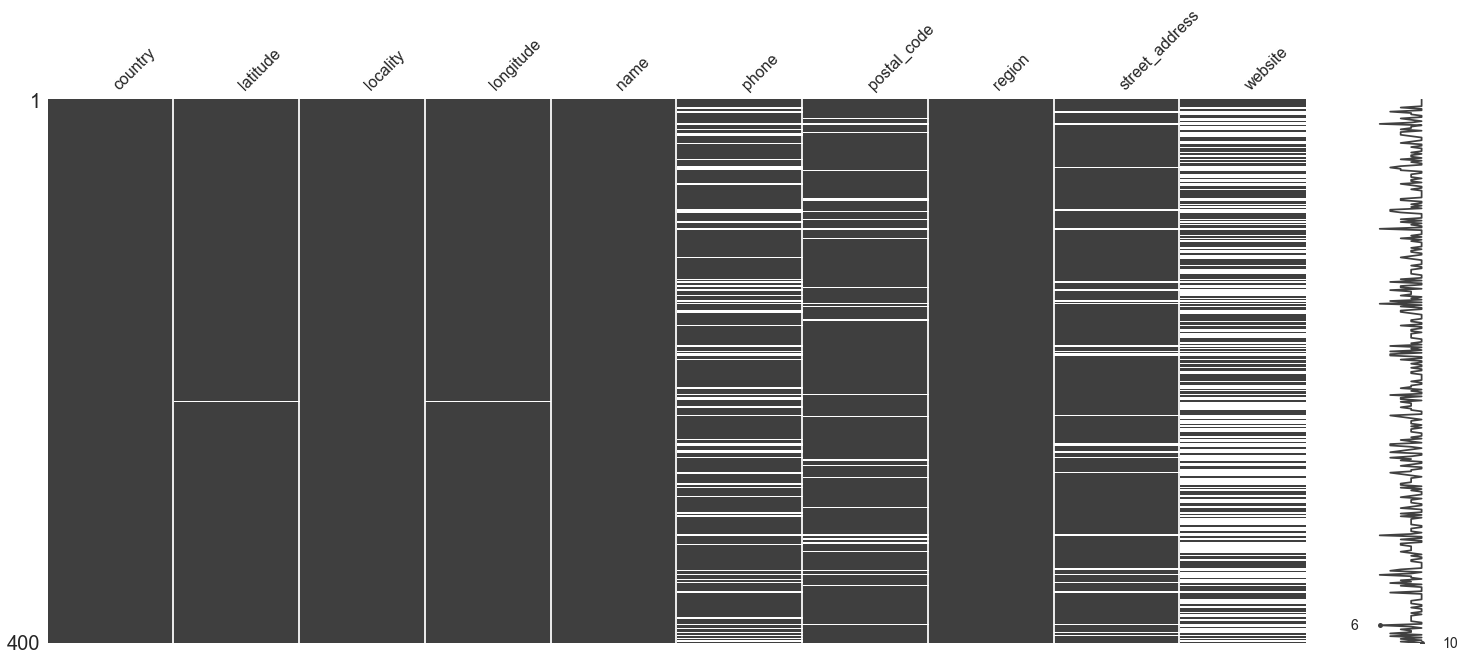

In [8]:
locu_test.shape
locu_test = locu_test.replace("", np.nan)
locu_test.head()

msno.matrix(locu_test)

In [9]:
matches_train.shape
matches_train.head()

(360, 0)

,
locu_id,foursquare_id
1dae3a8f02f730c3528d,4b694c01f964a520139e2be3
219c994dcc53f891ec26,506b6162e4b02bda7fc846ee
e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10
cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60
be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3


In [10]:
def get_matches(locu_train_path, foursquare_train_path, matches_train_path, locu_test_path, foursquare_test_path):
    return

In [11]:
# https://dedupe.readthedocs.io/en/latest/How-it-works.html
# Can we make these two (Record Linkage) assumptions:
# (A) two records can only refer to the same entity if they are from different datasets
# (B) no other record can match either of those two records.

# https://github.com/dedupeio/rlr
# https://recordlinkage.readthedocs.io/en/latest/about.html
from sklearn.linear_model import LogisticRegression
import recordlinkage

### Preprocessing

In [12]:
from recordlinkage.preprocessing import clean, phonenumbers

def preprocess(df1, df2):
    
    df1
    df2
    
    # drop country, locality and region
    df1 = df1.drop(['country', 'locality', 'region'], axis=1)
    df2 = df2.drop(['country', 'locality', 'region'], axis=1)

    # remove all non-numbers from phone & convert to numeric
    df1.loc[:, 'phone'] = pd.to_numeric(phonenumbers(df1.loc[:, 'phone']))
    df2.loc[:, 'phone'] = pd.to_numeric(phonenumbers(df2.loc[:, 'phone']))
    
    # convert postal_code to numeric
    df1.loc[:, 'postal_code'] = pd.to_numeric(df1.loc[:, 'postal_code'])
    df2.loc[:, 'postal_code'] = pd.to_numeric(df2.loc[:, 'postal_code'])
    
    # clean street_address & website
    df1.loc[:, 'street_address'] = clean(df1.loc[:, 'street_address'])
    df1.loc[:, 'website'] = clean(df1.loc[:, 'website'])
    
    df2.loc[:, 'street_address'] = clean(df2.loc[:, 'street_address'])    
    df2.loc[:, 'website'] = clean(df2.loc[:, 'website'])
    
    # convert NaNs to 0s for numerics
    df1.loc[:,['latitude', 'longitude', 'phone', 'postal_code']] = \
    df1.loc[:,['latitude', 'longitude', 'phone', 'postal_code']].replace(np.nan, 0)
    
    df2.loc[:,['latitude', 'longitude', 'phone', 'postal_code']] = \
    df2.loc[:,['latitude', 'longitude', 'phone', 'postal_code']].replace(np.nan, 0)

    return df1, df2

locu_train, four_train = preprocess(locu_train, four_train)

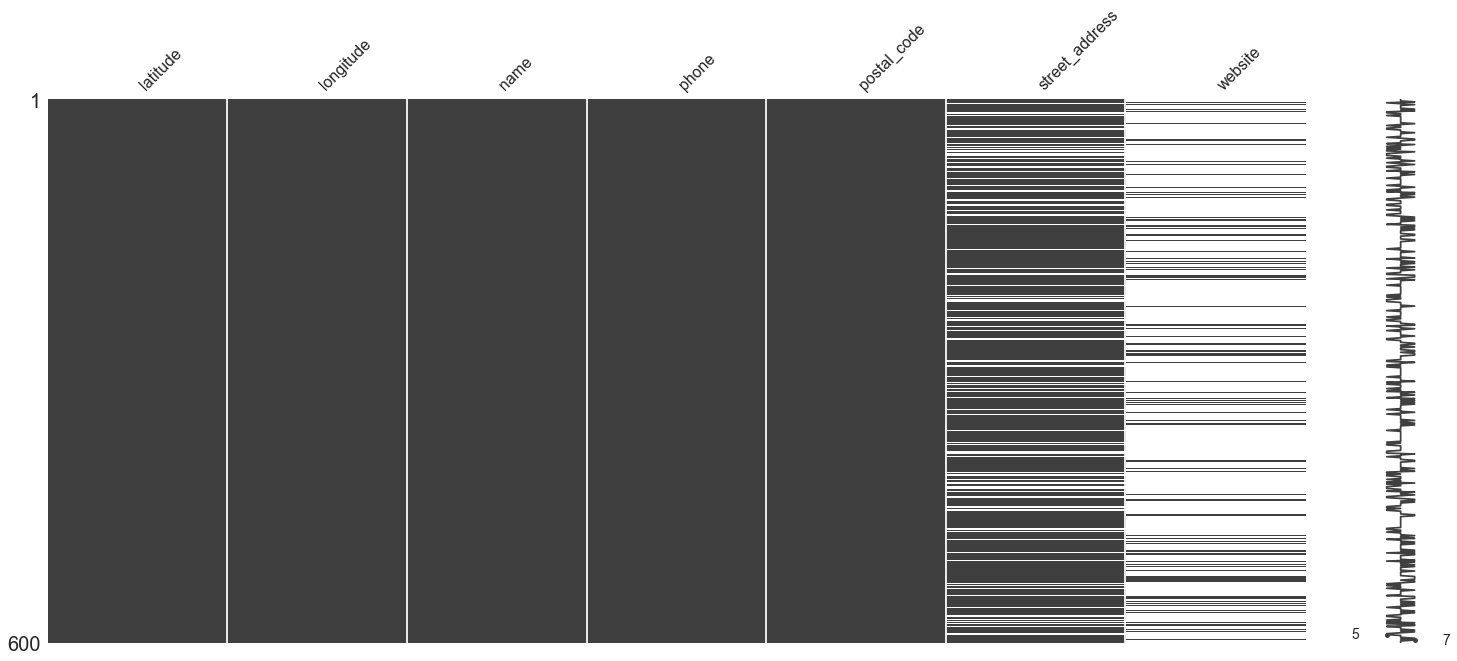

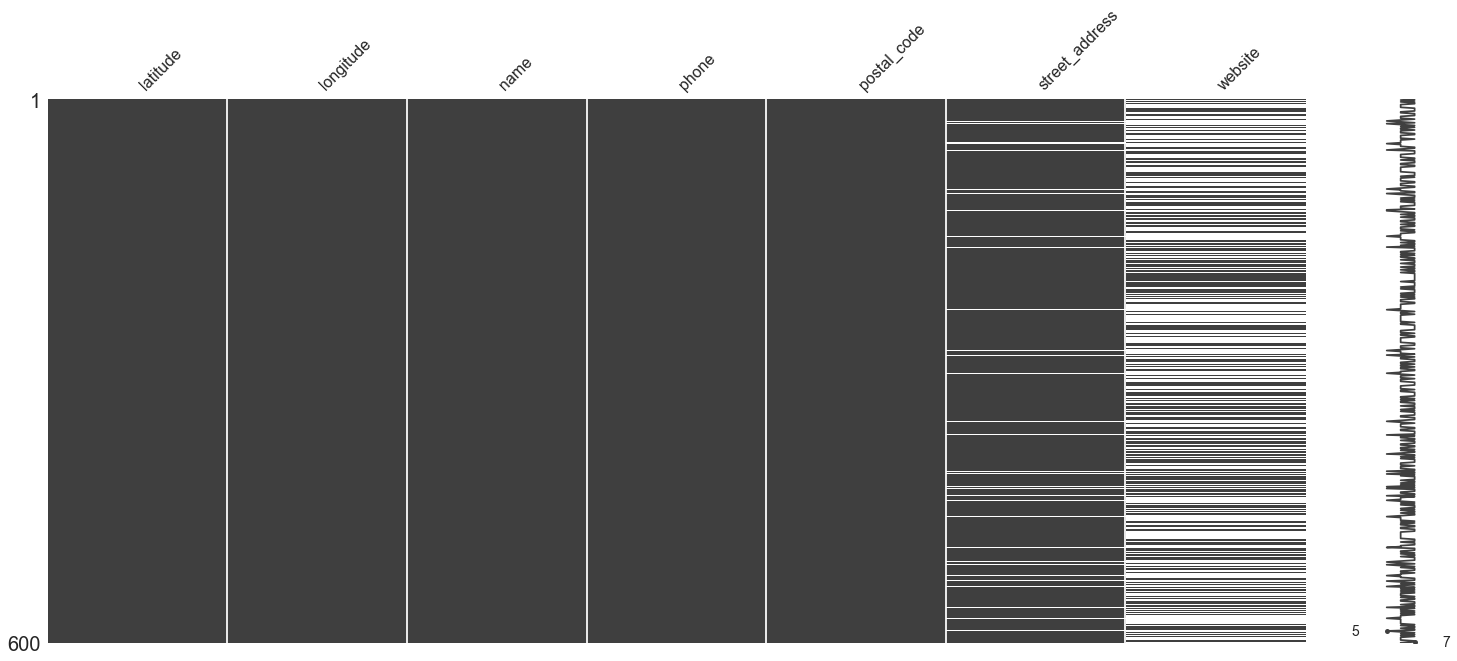

In [13]:
# shouldn't be any NaNs for numeric columns now
msno.matrix(four_train)
msno.matrix(locu_train)

### Index & Compare Strings

In [14]:
from recordlinkage.base import BaseIndexator

def indexpairs(df1, df2):
    indexer = recordlinkage.FullIndex() # BlockIndex(on='postal_code')
    return indexer.index(locu_train, four_train)

    # Customer Indexer
    # class FirstLetterOfNameIndex(BaseIndexator):
    #     """Custom class for indexing"""

    #     def __init__(self, letter):
    #         super(FirstLetterOfNameIndex, self).__init__()

    #         # the letter to save
    #         self.letter = letter

    #     def _link_index(self, df_a, df_b):
    #         """Make record pairs that agree on the first letter of the given name."""

    #         # Select records with names starting with a 'letter'.
    #         a_startswith_w = df_a[df_a['name'].str.startswith(self.letter) == True]
    #         b_startswith_w = df_b[df_b['name'].str.startswith(self.letter) == True]

    #         # Make a product of the two numpy arrays
    #         return pd.MultiIndex.from_product(
    #             [a_startswith_w.index.values, b_startswith_w.index.values],
    #             names=[df_a.index.name, df_b.index.name]
    #         )

    # for letter in 'abcdefghijklmnopqrstuvwxyz':
    #     indexer = FirstLetterOfNameIndex(letter)
    #     candidate_pairs = candidate_pairs | indexer.index(locu_train, four_train)

candidate_pairs = indexpairs(locu_train, four_train)
print (len(locu_train), len(four_train), len(candidate_pairs))

600 600 360000


In [15]:
# TODO: reduce where distances are very low (drop if less than .5 Lev for example)
# TODO: weighting outcomes (Trues for than False for example)

def comparestrings(df1, df2, cand_pairs):

    compare = recordlinkage.Compare()

    # initialise similarity measurement algorithms
    # _ = compare.string('country', 'country', method='levenshtein', label='country')
    # _ = compare.string('locality', 'locality', method='levenshtein', label='locality')
    _ = compare.geo('latitude', 'longitude', 'latitude', 'longitude', scale=1, label='geo_coord')
    _ = compare.string('name', 'name', method='levenshtein', label='name')
    _ = compare.numeric('phone', 'phone', scale=1, label='phone')
    _ = compare.numeric('postal_code', 'postal_code', scale=1, label='postal_code')
    # _ = compare.string('region', 'region', method='levenshtein', label='region')
    _ = compare.string('street_address', 'street_address', method='levenshtein', label='street_address')
    _ = compare.string('website', 'website', method='levenshtein', label='website')

    # compute similarity measurements
    return compare.compute(cand_pairs, df1, df2)

features = comparestrings(locu_train, four_train, candidate_pairs)

# features = features.loc[features['street_address'] > .1]
# features = features.loc[features['name'] > .1]


tuples = list(matches_train.index)
locu_index = [i[0] for i in tuples]
four_index = [i[1] for i in tuples]
four_matches = four_train.loc[four_index]
locu_matches = locu_train.loc[locu_index]

temp = matches_train.reset_index().join(four_matches,on=['foursquare_id'])
matches = temp.join(locu_matches,on=['locu_id'],lsuffix='_foursquare',rsuffix='_locu').set_index(matches_train.index.names)

In [16]:
features.head()
features.describe()

geo_coord      name  phone  \
id                   id                                                     
cc9e8f40230c6ead2873 4f328ea619836c91c7e3714a        0.0  0.166667    0.0   
                     4c37b5f6ae2da593a56affc5        0.0  0.090909    0.0   
                     4b41060df964a52098bf25e3        0.0  0.264706    0.0   
                     3fd66200f964a520ece41ee3        0.0  0.181818    0.0   
                     52064aab11d284f64d088329        0.0  0.136364    0.0   

                                               postal_code  street_address  \
id                   id                                                      
cc9e8f40230c6ead2873 4f328ea619836c91c7e3714a          0.0          0.0625   
                     4c37b5f6ae2da593a56affc5          0.0          0.1250   
                     4b41060df964a52098bf25e3          0.0          0.1250   
                     3fd66200f964a520ece41ee3          0.0          0.1875   
                     52064aab11d284f64d088329          0.0          0.0000   

                                                website  
id                   id                                  
cc9e8f40230c6ead2873 4f328ea619836c91c7e3714a  0.000000  
                     4c37b5f6ae2da593a56affc5  0.000000  
                     4b41060df964a52098bf25e3  0.000000  
                     3fd66200f964a520ece41ee3  0.521739  
                     52064aab11d284f64d088329  0.000000

,geo_coord,name,phone,postal_code,street_address,website
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,0.094782,0.146951,0.088174,0.060358,0.188584,0.037034
std,0.208010,0.077182,0.283546,0.220923,0.166264,0.123305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.100000,0.000000,0.000000,0.058824,0.000000
50%,0.000000,0.142857,0.000000,0.000000,0.166667,0.000000
75%,0.000000,0.187500,0.000000,0.000000,0.285714,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train Test Split

In [17]:

# parameters: 
#   x_all, a data_frame of all your comparison vectors
#   y_all_matches, a data_frame with 0 columns and multiindexed with the matching pairs
# returns:
#   x_train, a subset of x_all that will be used for model training
#   y_train_matches_index, a multiindex object of the the matching pairs
def traintestsplit(x_all, y_all_matches):
    
    tuples = list(y_all_matches.index)
    y_matches_index = pd.MultiIndex.from_tuples(tuples, names=['locu_id', 'foursquare_id'])
    
    x_train = x_all[0:200000]
    y_train_matches_index = x_train.index & y_matches_index
#     x_train_features = x_train_all.loc[y_matches_index]
    
    return x_train, y_train_matches_index, y_matches_index

train_pairs, train_matches_index, all_matches_index = traintestsplit(features, matches_train)

In [18]:
features.shape
matches_train.shape

train_pairs.shape
train_matches_index.shape


cols = np.array(matches.columns.tolist())
order = [0,7,1,8,2,9,3,10,4,11,5,12,6,13]
cols = list(cols[order])
matches_reordered = matches[cols]
matches_reordered

(360000, 6)

(360, 0)

(200000, 6)

(193,)

,,latitude_foursquare,latitude_locu,longitude_foursquare,longitude_locu,name_foursquare,name_locu,phone_foursquare,phone_locu,postal_code_foursquare,postal_code_locu,street_address_foursquare,street_address_locu,website_foursquare,website_locu
locu_id,foursquare_id,,,,,,,,,,,,,,
1dae3a8f02f730c3528d,4b694c01f964a520139e2be3,40.744466,40.744466,-73.981181,-73.981181,Da' Giulio,Da' Giulio,2.128893e+09,2.128893e+09,10016.0,10016.0,176 lexington ave,176 lexington ave,httpwwwdagiulionycom,httpwwwdagiulionycom
219c994dcc53f891ec26,506b6162e4b02bda7fc846ee,40.765414,40.765414,-73.957235,-73.957235,Yogurtland,Yogurtland,0.000000e+00,0.000000e+00,10065.0,10065.0,1275 1st ave,1275 1st ave,NaN,NaN
e06dd73a03f255a877de,4fcb5d2ee4b0928dc1d32f10,40.761344,40.761401,-73.989942,-73.990043,Saigon 9 West Cafe,Saigon 9 West Cafe,2.127580e+09,2.127580e+09,10036.0,10036.0,358 w 47th st,358 west 47th st,NaN,NaN
cf429074f6b45f0ad183,4c2d2315e116e21e1b1a8e60,40.756402,40.756213,-73.968210,-73.968028,Hide-Chan Ramen,Hide-Chan Ramen,2.128132e+09,2.128132e+09,10022.0,10022.0,248 e 52nd st,248 east 52nd st,httphidechanramencom,httphidechanramencom
be428df89cec53c29e96,43ed7e9ef964a5204e2f1fe3,40.738084,40.738000,-73.990640,-73.991000,Rosa Mexicano,Rosa Mexicano - Union Square,2.125333e+09,2.125333e+09,10003.0,10003.0,9 e 18th st,9 e 18th st,httpwwwrosamexicanocomlocationsnewyorknyunions...,httpwwwrosamexicanocom
5f315252d5a2c497aa54,4af73d00f964a520830722e3,40.764423,40.764304,-73.980917,-73.980913,Starbucks,Starbucks,2.125862e+09,2.125862e+09,10019.0,10019.0,870 7th ave,870 7th ave,NaN,httpwwwstarbuckscom
a1b151935bf166cd41ae,4ff503ece4b054fba983af0e,40.726755,40.726755,-73.987169,-73.987169,Two Swords Tavern,Two Swords Tavern,0.000000e+00,0.000000e+00,10003.0,10003.0,330 e 6th st,330 e 6th st,NaN,NaN
e1d1499e736a8e2f4611,4bad33adf964a52096383be3,40.722915,40.722915,-73.998114,-73.998114,Whiskey Friday,Whiskey Friday,0.000000e+00,0.000000e+00,10012.0,10012.0,spring st crosby st,spring st crosby st,NaN,NaN
be6bac74a9d485892d9f,3fd66200f964a5206fe91ee3,40.732381,40.732286,-73.999191,-73.999279,Babbo,Babbo Ristorante,2.127770e+09,2.127770e+09,10011.0,10011.0,110 waverly pl,110 waverly pl,httpwwwbabbonyccom,httpbabbonyccom


In [19]:
logreg = recordlinkage.LogisticRegressionClassifier()
svm = recordlinkage.SVMClassifier()

In [20]:
# Train the classifier
_ = logreg.learn(train_pairs, train_matches_index)
print ("LogReg Intercept: ", logreg.intercept)
print ("LogReg Coefficients: ", logreg.coefficients)

# Train the classifier
_ = svm.learn(train_pairs, train_matches_index)

LogReg Intercept:  -11.88892396922685
LogReg Coefficients:  [3.394979394519043, 7.1917738703171077, 2.135695941513728, 0.96403699763070227, 2.7882086442970468, 0.71711534922014131]


In [21]:
# Predict the match status for all record pairs
# features.shape
# features.head()

# parameters:
#   x, a data_frame of all your comparison vectors
# returns:
#   results_index, a multiindex object of predicted matches
def predict(x):    
    results_index = svm.predict(x).set_names(['locu_id', 'foursquare_id'])

    # pred_matches = features[results_index]

    # matches_index
    # results_index

    # locu_train[locu_train.index == '006b18ff3990337edc5b']
    # four_train[four_train.index == '3fd66200f964a52008e91ee3']

    # results_index

    # temp = pd.DataFrame(matches_index.levels).T
    # results = pd.DataFrame(results_index.levels).T
    # results = results.drop(results.index[585:590])
    # results.columns = ['locu_id', 'foursquare_id']
    # results = results.set_index(['locu_id', 'foursquare_id'])
    # results


    # tuples = list(results.index)
    # clean_results_index = pd.MultiIndex.from_tuples(tuples, names=['locu_id', 'foursquare_id'])
    
    return results_index

results_index = predict(features)
len(results_index)

340

In [22]:
confn_matrix = recordlinkage.confusion_matrix(all_matches_index, results_index, len(features))
confn_matrix

array([[   334,     26],
       [     6, 359634]])

In [23]:
print("Precision: ", recordlinkage.precision(confn_matrix))
print("Recall:    ", recordlinkage.recall(confn_matrix))
print("Accuracy:  ", recordlinkage.accuracy(confn_matrix))
print("F1 Score:  ", recordlinkage.fscore(confn_matrix))

Precision:  0.9823529411764705
Recall:     0.9277777777777778
Accuracy:   0.9999111111111111
F1 Score:   0.9542857142857143


In [24]:
locu_test, four_test = preprocess(locu_test, four_test)
test_candidate_pairs = indexpairs(locu_test, four_test)
test_features = comparestrings(locu_test, four_test, test_candidate_pairs)

test_results_index = predict(test_features)
